### **Classification**

Task 3.1.1: Choose; Load; Inspect and Explore your Data

First few rows of the dataset:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None

Summary statistics of the dataset:
            Weight     Length1     L

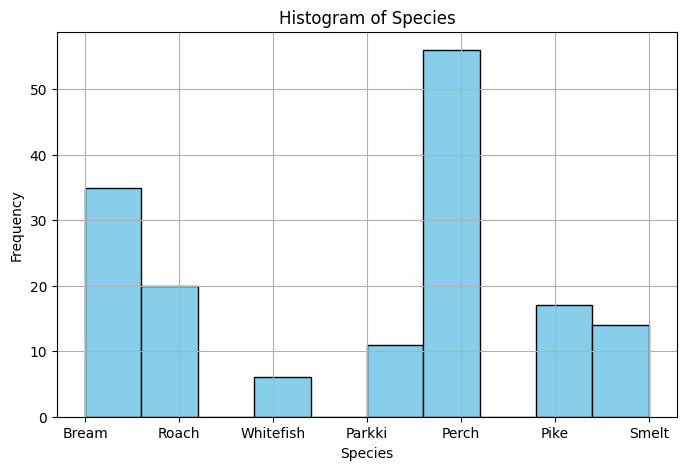

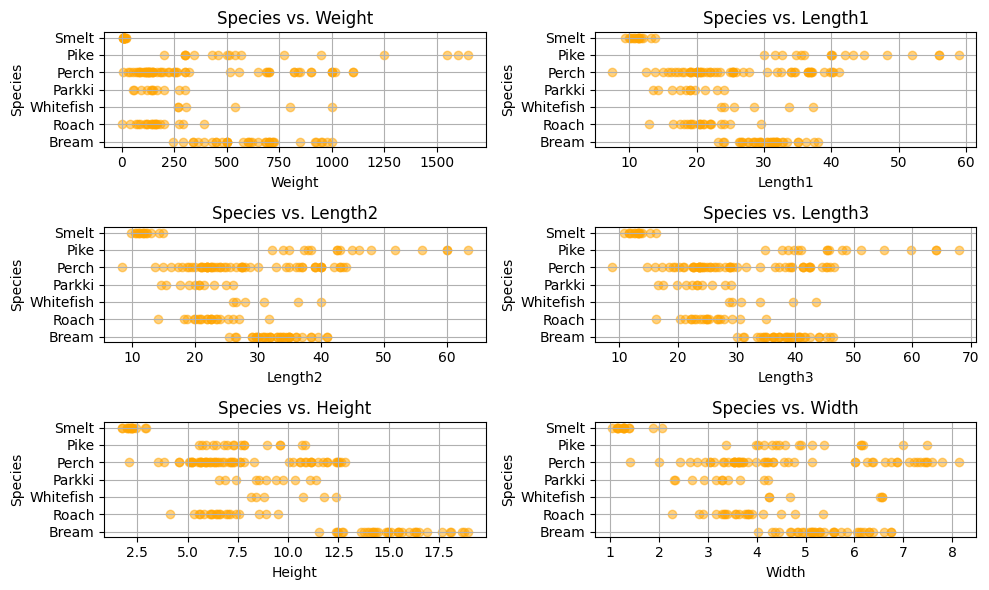

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Fish.csv')

print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nSummary statistics of the dataset:")
print(df.describe())
plt.figure(figsize=(8, 5))
plt.hist(df['Species'], color='skyblue', edgecolor='black')
plt.title('Histogram of Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
features = df.columns.drop('Species')
num_cols = 2
num_plots = len(features)
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)

for ax, feature in zip(axes.flatten(), features):
    ax.scatter(df[feature], df['Species'], alpha=0.5, color='orange')
    ax.set_title(f'Species vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Species')
    ax.grid(True)

plt.tight_layout()
plt.show()


Task 3.1.2: Build Primary Model

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
dt_score = dt_classifier.score(X_test, y_test)
rf_score = rf_classifier.score(X_test, y_test)
if dt_score > rf_score:
    print("Decision Tree Classifier performed better with score:", dt_score)
else:
    print("Random Forest Classifier performed better with score:", rf_score,dt_score)

Random Forest Classifier performed better with score: 0.78125 0.78125


Task 3.1.3: Hyper-parameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)


rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_
print("Best Hyperparameters for Decision Tree Classifier:", best_dt_params)

best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest Classifier:", best_rf_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Decision Tree Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Task 3.1.4: Feature Selection


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
dt_pipeline = make_pipeline(RFE(estimator=DecisionTreeClassifier()), DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
selected_features = X.columns[dt_pipeline.named_steps['rfe'].support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Length1', 'Length2', 'Height'], dtype='object')


Task 3.1.5: Final Model

In [ ]:
final_dt_classifier = DecisionTreeClassifier(**best_dt_params)
final_dt_classifier.fit(X_train[selected_features], y_train)

final_rf_classifier = RandomForestClassifier(**best_rf_params)
final_rf_classifier.fit(X_train[selected_features], y_train)
final_dt_score = final_dt_classifier.score(X_test[selected_features], y_test)
final_rf_score = final_rf_classifier.score(X_test[selected_features], y_test)

if final_dt_score > final_rf_score:
    print("Final Decision Tree Classifier performed better with score:", final_dt_score)
else:
    print("Final Random Forest Classifier performed better with score:", final_rf_score)


Final Random Forest Classifier performed better with score: 0.8125


### **Regression**

Task 3.2.1: Choose; Load; Inspect and Explore your Data

   Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74  
              Year          World          OECD         BRICS        Europe  \
count    31.000000      31.000000     31.000000     31.000000     31.000000   
mean   2005.000000 

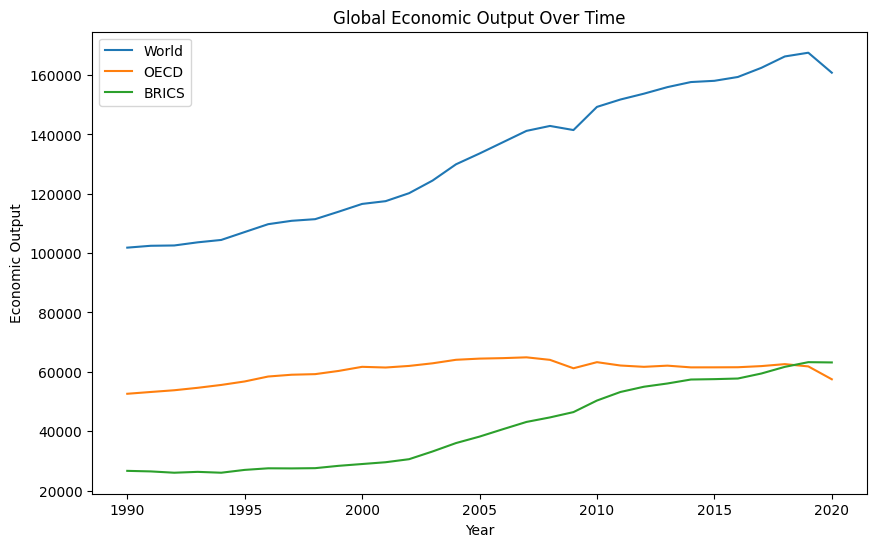

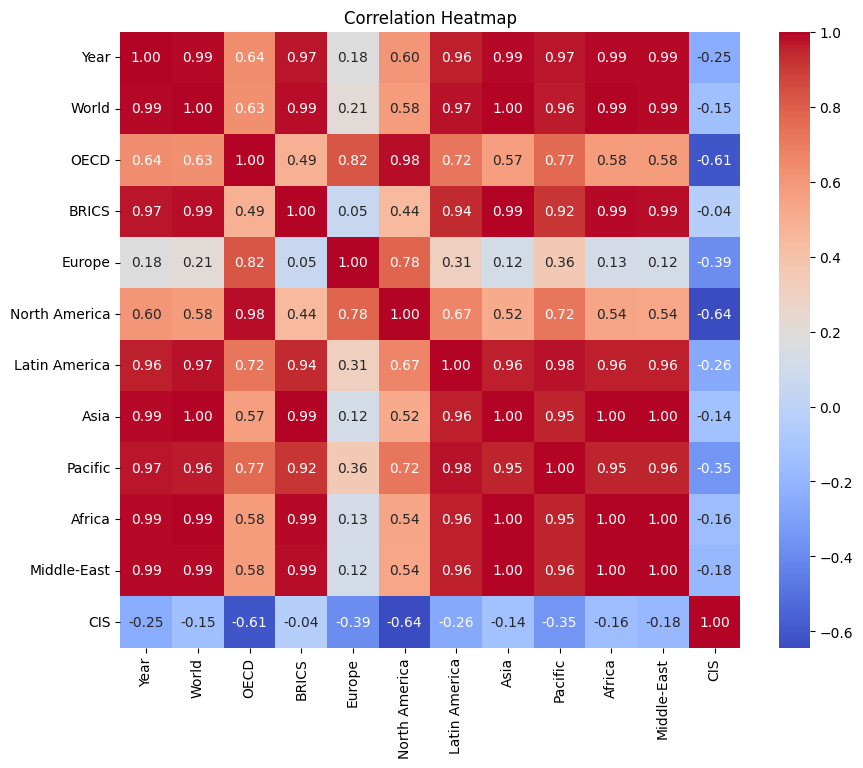

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("energy.csv")

print(data.head())

print(data.describe())

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['World'], label='World')
plt.plot(data['Year'], data['OECD'], label='OECD')
plt.plot(data['Year'], data['BRICS'], label='BRICS')
plt.xlabel('Year')
plt.ylabel('Economic Output')
plt.title('Global Economic Output Over Time')
plt.legend()
plt.show()

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Task 3.2.2: Build Primary Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X = data[['Year']]
y = data['World']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression performance metrics:", mse_lr)
print("Random Forest Regression performance metrics:", mse_rf)


Linear Regression performance metrics: 9415801.41477136
Random Forest Regression performance metrics: 5427398.410569272


Task 3.2.3: Hyper-parameter Optimization with Cross-Validation


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting Regressor:", grid_search_gb.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


Task 3.2.4: Feature Selection


In [ ]:
best_rf_model = grid_search.best_estimator_
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(5)['Feature'].tolist()
print("Top 5 features based on importance:", top_features)


Top 5 features based on importance: ['Year']


Task 3.2.5: Final Model


In [ ]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

final_rf_model = RandomForestRegressor(**grid_search.best_params_)
final_rf_model.fit(X_train_selected, y_train)

final_gb_model = GradientBoostingRegressor(**grid_search_gb.best_params_)
final_gb_model.fit(X_train_selected, y_train)


GradientBoostingRegressor(max_depth=5, n_estimators=50)